# Project Term 1 and 2


1. About the Dataset:
This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources:

1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038.
Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037.
This data set consists of three types of entities:

the specification of an auto in terms of various characteristics,
its assigned insurance risk rating,
its normalized losses in use as compared to other cars.
The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

## Importing all the relevant packages

In [57]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)   

## Importing the dataset

In [4]:
base_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Automobile_data.csv")

## Exploring the data

In [251]:
base_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,0,?,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000
73,0,?,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.8,3.35,8.0,184,4500,14,16,40960
74,1,?,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.8,3.35,8.0,184,4500,14,16,45400
47,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250
48,0,?,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550


In [252]:
base_data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
159,0,91,toyota,diesel,std,four,hatchback,fwd,front,95.7,166.3,64.4,52.8,2275,ohc,four,110,idi,3.27,3.35,22.5,56,4500,38,47,7788
90,1,128,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,2017,ohc,four,103,idi,2.99,3.47,21.9,55,4800,45,50,7099
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
30,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1713,ohc,four,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479


In [60]:
base_data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [61]:
base_data.describe(include = 'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


## Observations:
#### There are no missing values
#### Normalized losses cannot be used as 20% of the observations have value ?
#### Price is of type Object, so this needs to be converted to numeric to do meaningful analysis

In [62]:
base_data.sample(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,13645
26,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609
155,0,91,toyota,gas,std,four,wagon,4wd,front,95.7,169.7,63.6,59.1,3110,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800,27,32,8778
153,0,77,toyota,gas,std,four,wagon,fwd,front,95.7,169.7,63.6,59.1,2280,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800,31,37,6918
25,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
106,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,178.5,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
87,1,125,mitsubishi,gas,turbo,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2403,ohc,four,110,spdi,3.17,3.46,7.5,116,5500,23,30,9279
19,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6295


### Profiling of the dataset to understand each variables in detail

In [64]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(base_data)
profile.to_file("PreProcessed_auto_profile.html")   

In [82]:
Auto_newDf = base_data[base_data['price'] != '?']  #removed the 4 observations which had '?' in price 
Auto_newDf.to_excel("output.xlsx")

#### Converted the price column to numeric by exporting the output to excel and coverting the column to number in excel
#### Then loaded to new df from the excel file
#### Did new profiling of the processed data

In [87]:
ProcessedAuto_df = pd.read_excel("output.xlsx")
profiling = pandas_profiling.ProfileReport(ProcessedAuto_df)
profiling.to_file("PostProcessed_auto_profile.html") 

In [88]:
ProcessedAuto_df.index

RangeIndex(start=0, stop=201, step=1)

In [119]:
ProcessedAuto_df1 = ProcessedAuto_df.drop(['normalized-losses'], axis = 1) #droppped the column 'normalized-losses' as it 
                                                                           #contains too many '?' as values


In [120]:
ProcessedAuto_df1.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [352]:
ProcessedAuto_df1.groupby(['make','fuel-type'])['price'].agg(['count'])

,,count
make,fuel-type,
alfa-romero,gas,3
audi,gas,6
bmw,gas,8
chevrolet,gas,3
dodge,gas,9
honda,gas,13
isuzu,gas,2
jaguar,gas,3
mazda,diesel,2


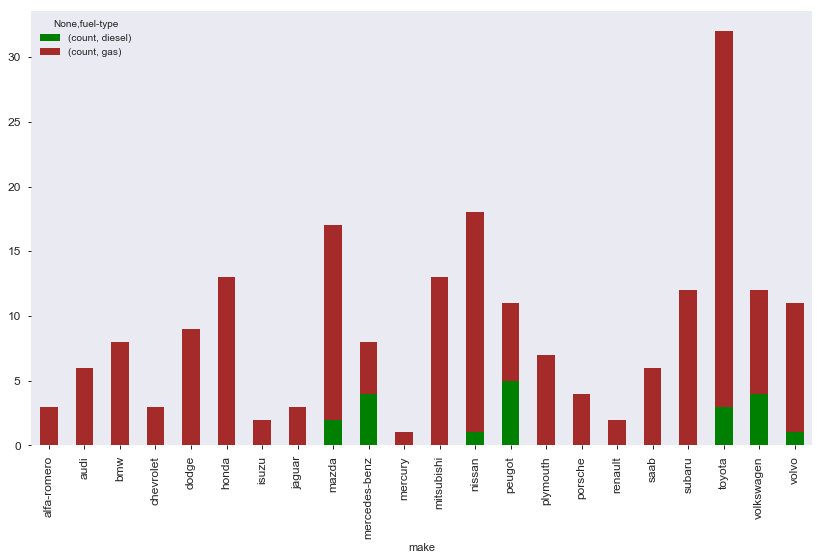

In [351]:

Group_df = ProcessedAuto_df1.groupby(['make','fuel-type'])['price'].agg(['count'])
Group_df.unstack().plot(kind='bar',stacked=True,  color=['green','brown'], grid=False, figsize=(14,8), fontsize = 12)

### The above comparision of the brands by fuel type shows that there are very few diesel cars

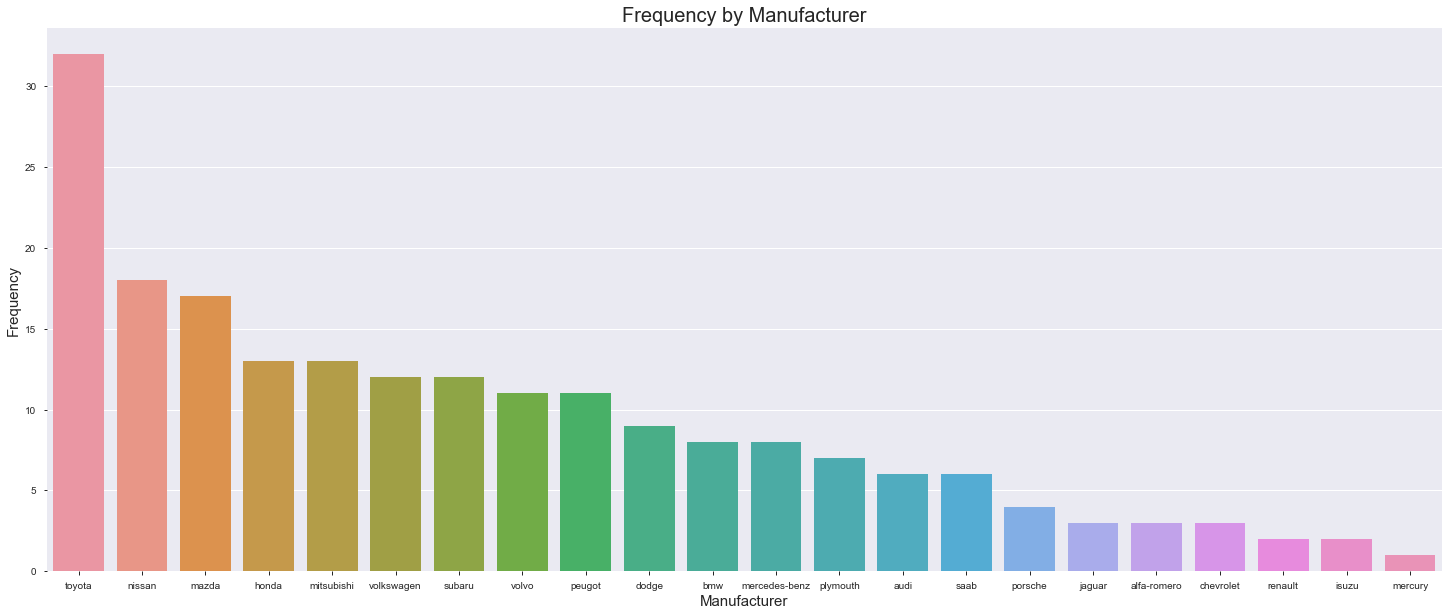

In [256]:
plt.figure(figsize=(25,10))
sns.barplot(x=ProcessedAuto_df1['make'].value_counts().index,
              y=ProcessedAuto_df1['make'].value_counts().values)
plt.xlabel('Manufacturer',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.title('Frequency by Manufacturer',fontsize = 20)
plt.show()


### Toyota is biggest brand by count of cars

Text(0,0.5,'Frequency')

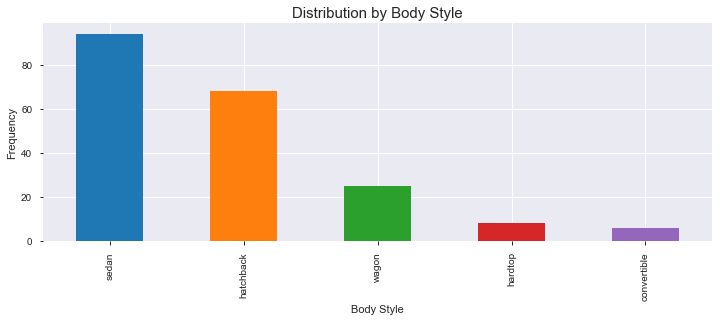

In [297]:
plt.figure(figsize=(12,4))
ProcessedAuto_df1['body-style'].value_counts().plot.bar()
plt.title("Distribution by Body Style",fontsize = 15)
plt.xlabel("Body Style")
plt.ylabel("Frequency")

#### Sedan has the maximum number of observations in the data

In [196]:
MakeList = ['toyota','mitsubishi','nissan']
Top3 = ProcessedAuto_df1[ProcessedAuto_df1['make'].isin(MakeList)] 


Text(0,0.5,'Count')

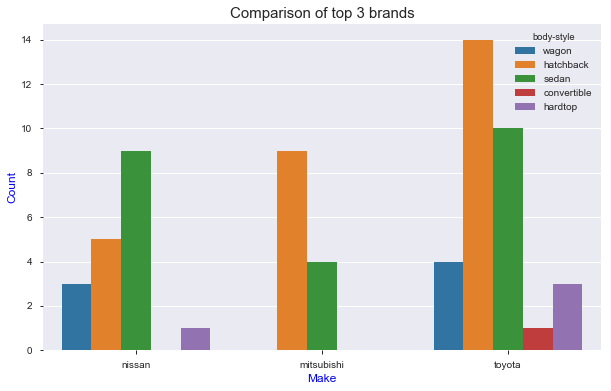

In [302]:
fig,ax =plt.subplots(figsize=(10,6))
sns.countplot(data = Top3,x = 'make', hue='body-style')
plt.title('Comparison of top 3 brands', fontsize = 15)
plt.xlabel("Make",fontsize = 12,color='blue')
plt.ylabel("Count",fontsize = 12,color='blue')

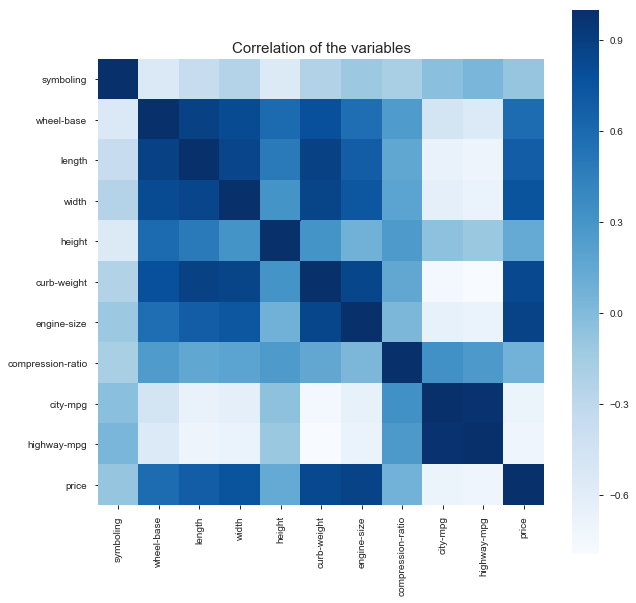

In [334]:
features_correlation = ProcessedAuto_df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.title("Correlation of the variables",fontsize = 15)
plt.show()

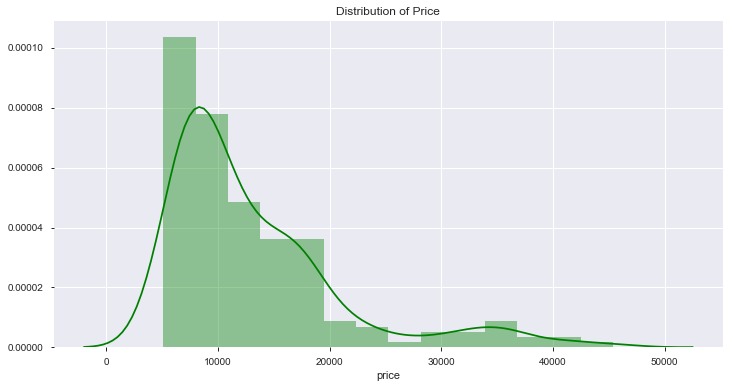

In [290]:
plt.figure(figsize=(12,6))
sns.distplot(ProcessedAuto_df1['price'],color ='g')
plt.title('Distribution of Price')
#plt.yticks([0.1,0.2,0.3,0.4,50.5])
plt.show()

Text(0,0.5,'city mileage')

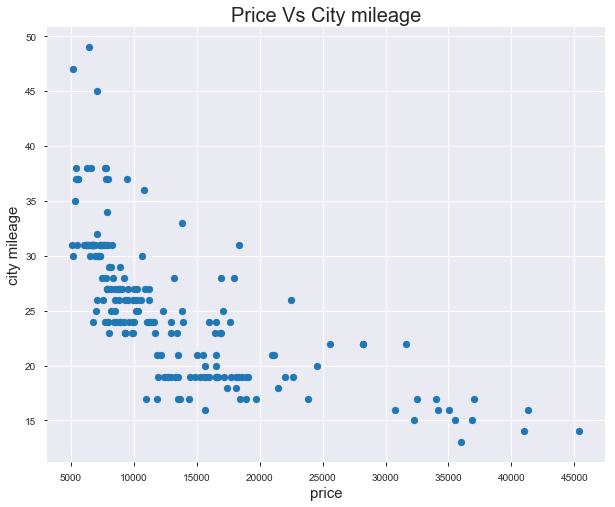

In [253]:
# create a figure and axis
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(ProcessedAuto_df1['price'], ProcessedAuto_df1['city-mpg'])
# set a title and labels
ax.set_title('Price Vs City mileage',fontsize = 20)
ax.set_xlabel('price',fontsize = 15)
ax.set_ylabel('city mileage',fontsize = 15)

#### Comparing price and city mileage we see that the lower priced cars, especially hatchback and wagon has better mileage

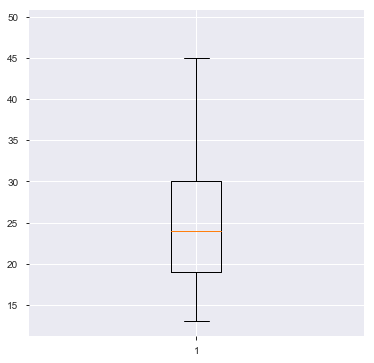

In [237]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
#Variable
ax.boxplot(ProcessedAuto_df1['city-mpg'])
plt.show()

#### Comparing spread of city mileage, we see that the median is 24
### Most of the cars have mileage between 19 and 30

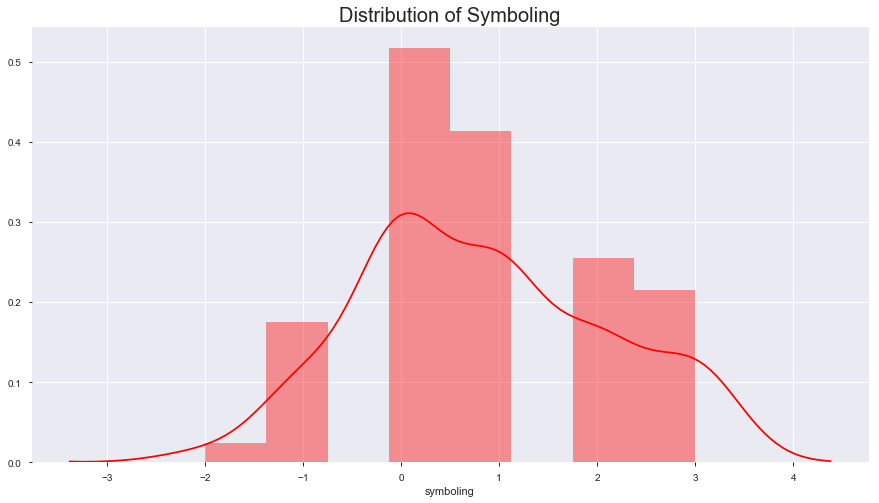

In [243]:
plt.figure(figsize=(15,8))
sns.distplot(ProcessedAuto_df1['symboling'],color ='r')
plt.title('Distribution of Symboling',fontsize = 20)
plt.show()

#### Mostly the symboling is spread between 0 and 1 meaning most of the cars are of average safety

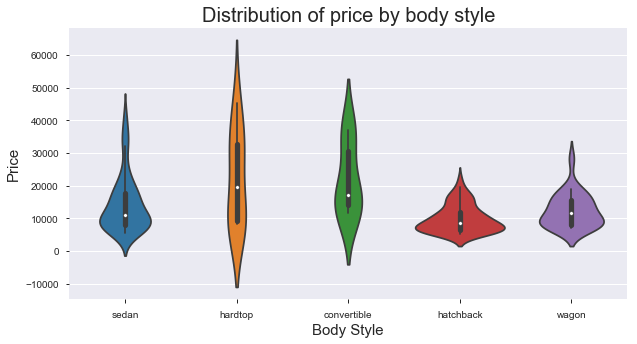

In [333]:
plt.figure(figsize=(10,5))
sns.violinplot(ProcessedAuto_df1['body-style'], ProcessedAuto_df1['price']) #Variable Plot
sns.despine()
plt.title("Distribution of price by body style",fontsize = 20)
plt.xlabel('Body Style',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.show()


#### Comparing Price and body style, we see that hatchback and wagon does not have much variation in prices
#### But hardtop and convertibles are spread on huge range of price


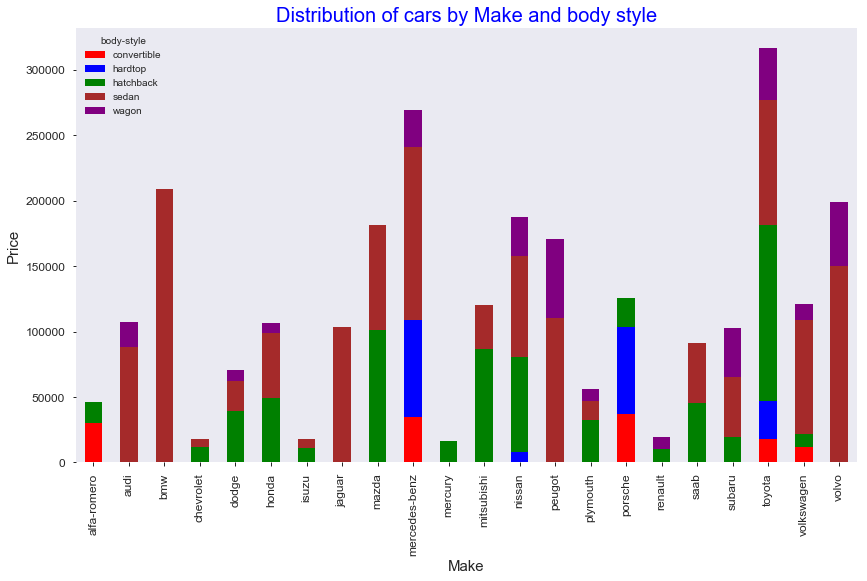

In [294]:

var = ProcessedAuto_df1.groupby(['make','body-style']).price.sum()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue','green','brown','purple'], grid=False, figsize=(14,8), fontsize = 12)
plt.title("Distribution of cars by Make and body style",fontsize = 20, color='blue')
plt.xlabel('Make',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.show()

#### Distribution by ‘Make’ and ‘Body style’ we infer that “Toyota” has most no of cars by value
#### Most of the Toyota cars are hatchback followed by sedan
#### Compared to first slide we see that “Mercedes Benz” is second brand by value followed by BMW


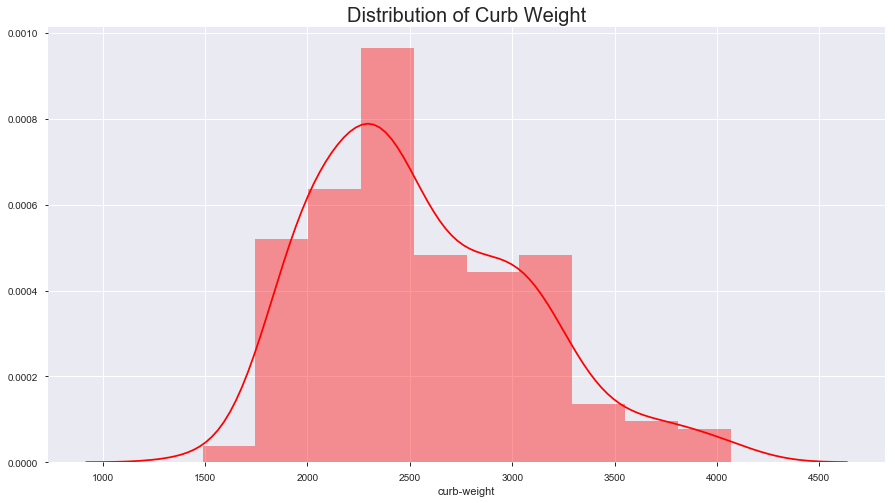

In [244]:
plt.figure(figsize=(15,8))
sns.distplot(ProcessedAuto_df1['curb-weight'],color ='r')
plt.title('Distribution of Curb Weight',fontsize = 20)
plt.show()

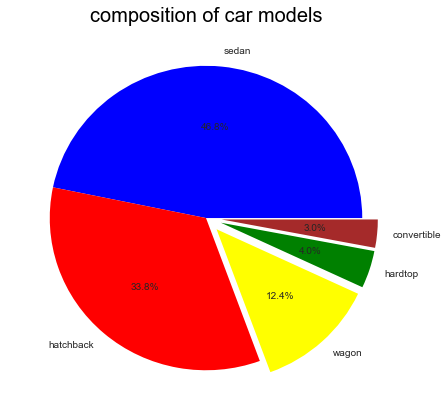

In [221]:
labels=ProcessedAuto_df1['body-style'].value_counts().index
colors=['blue','red','yellow','green','brown']
explode=[0,0,0.1,0.1,0.1]
values=ProcessedAuto_df1['body-style'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('composition of car models',color='black',fontsize=20)
plt.fontsize
plt.show()


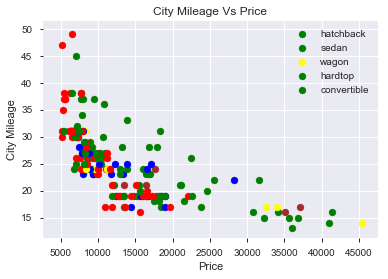

In [338]:

# create color dictionary
colors = {'hatchback':'red', 'sedan':'green', 'wagon':'blue','hardtop':'yellow','convertible':'brown'}
# create a figure and axis

fig, ax = plt.subplots()

# plot each data-point
for i in range(len(ProcessedAuto_df1['price'])):
    ax.scatter(ProcessedAuto_df1['price'][i], ProcessedAuto_df1['city-mpg'][i],color=colors[ProcessedAuto_df1['body-style'][i]])

# set a title and labels
ax.set_title('City Mileage Vs Price')
ax.set_xlabel('Price')
ax.set_ylabel('City Mileage')
ax.legend(colors)

#### Comparing Price and city mileage we the lower priced cars have better mileage
#### These are usually hatchbacks(red) and wagon(blue)
#### Some of the expensive sedans, hardtops and convertibles have very low mileage

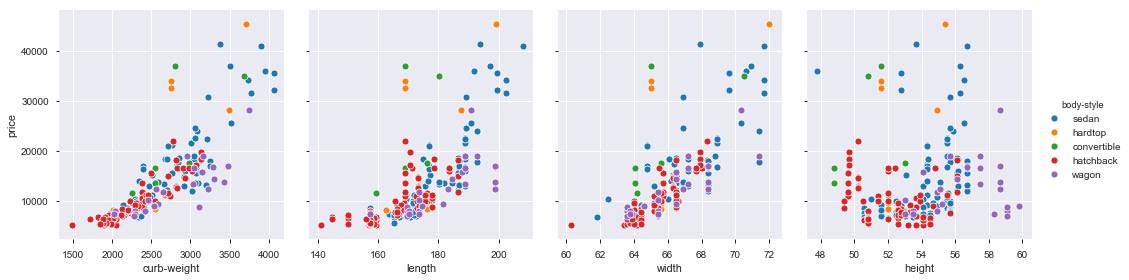

In [329]:

body_price_plot =  sns.pairplot(ProcessedAuto_df1, 
             size=4, aspect=0.9, 
             x_vars=['curb-weight','length','width','height'],
             y_vars=["price"], 
             kind='scatter',
             hue="body-style")

#### comparing price with variables 'curb-weight','length','width','height' we see a positive correlation

## Final Conclusions 
#### Based on the automobile dataset, we see that maximum cars are in hatchback and wagon category
#### Toyota is the brand with most number of cars
#### Mercedes Benz having fewer cars is second based on value(price)
#### Price increases based on length, width, curb-weight and engine-size
#### Mileage is better for low priced cars especially hatchbacks and wagons
#### Convertibles and hardtops are premium vehicles in higher price category
